## LINEAR REGRESSION ON CANDY DATA 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [DataLoading and description](#section2) <br>
3. [Importing the DataSets](#section3)<br>
4. [Overview](#section4)<br>
5. [Data PreProcessing](#section5)<br>
6. [Linear Regression](#section6)<br>
    - 6.1[Preparing X and y using pandas](#section601)<br>
    - 6.2 [Splitting X and y into training and test datasets.](#section602)<br>
    - 6.3 [Linear regression in scikit-learn](#section603)<br>
    - 6.4 [Using the Model for Prediction](#section604)<br>
7. [Model evaluation](#section7)<br>
    

## 1. Problem Statement

The goal is to __predict winpercent__ of candy using __Linear Regression__

## 2.Data Loading And Description

- The data consits of the information about the candies.Various variables present in the dataset includes the competitorname,the flovours of the candies i.e  chocolate,fruity,caramal,nougat etc ,sugarpercent,pricepercent,winpercent.
- The dataset compromises of __85 observations of 13 columns__ .Below is a table showing names of all the columns and their description.

| Column Name     | Description                                               |
| -------------   |:-------------                                            :| 
| competitorname  | company's name                                            | 
| chocolate       | type of the candy                                         |  
| fruity          | type of the candy                                         | 
| caramel         | type of the candy                                         |   
| peanutyalmondy  | type of the candy                                         |
| nougat          | type of the candy                                         |
| crispedricewafer| type of the candy                                         |
| hard            | type of the candy                                         |
| bar             | type of the candy                                         |
| pluribus        | type of the candy                                         |
| sugarpercent    | percentage of the sugar in the candy                      |
| pricepercent    | counts the price percent                                  |
| winpercent      | what is the percentage of winning                         |

## Importing Packages

In [15]:
import sys
!{sys.executable} -m pip install pandas_profiling

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plot
import seaborn as sns

%matplotlib inline
from subprocess import check_output

 ## 3. Importing the DataSet

In [4]:
candy_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")

In [5]:
candy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [6]:
profile = pandas_profiling.ProfileReport(candy_data)
profile.to_file(outputfile="C:/project/candy_preprocessing.html")

## 4. OVERVIEW

In [7]:
profile

Number of variables,13
Number of observations,85
Total Missing (%),0.0%
Total size in memory,8.7 KiB
Average record size in memory,104.9 B
Numeric,3
Categorical,0
Boolean,9
Date,0
Text (Unique),1
Rejected,0


## 5. DATA PREPROCESSING

In [8]:
85 - candy_data.count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [9]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [15]:
candy_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

 - _Dropping_ Columns _'Competitorname'_

In [10]:
candy = candy_data.drop(['competitorname'],axis =1)
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [12]:
candy_cat = candy_data.select_dtypes(include=['int64'])
candy_cat.columns.tolist()

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus']

## Bar Plots

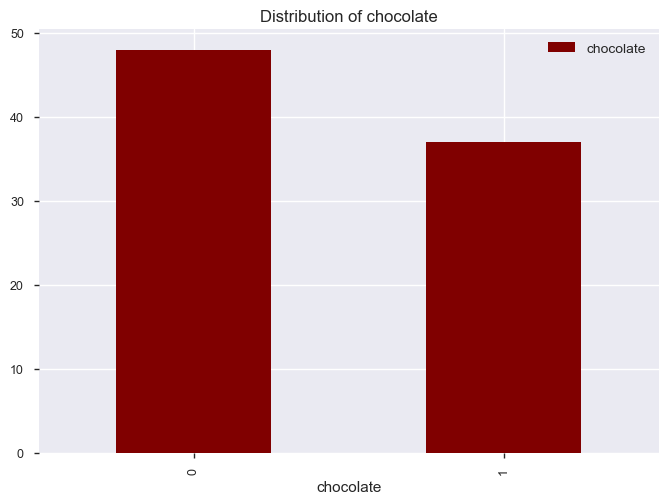

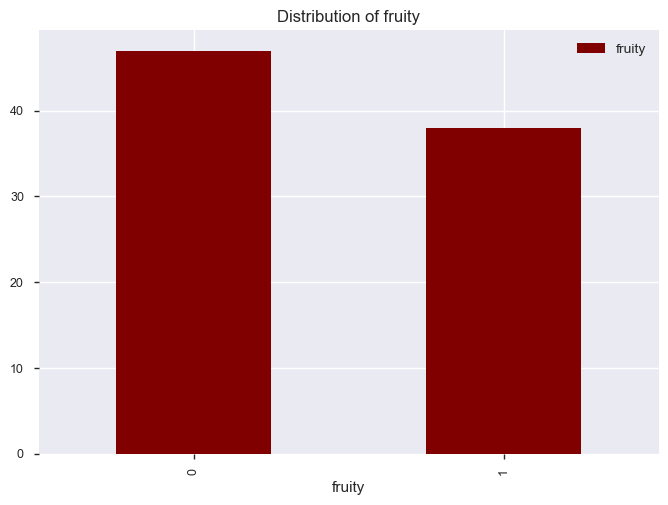

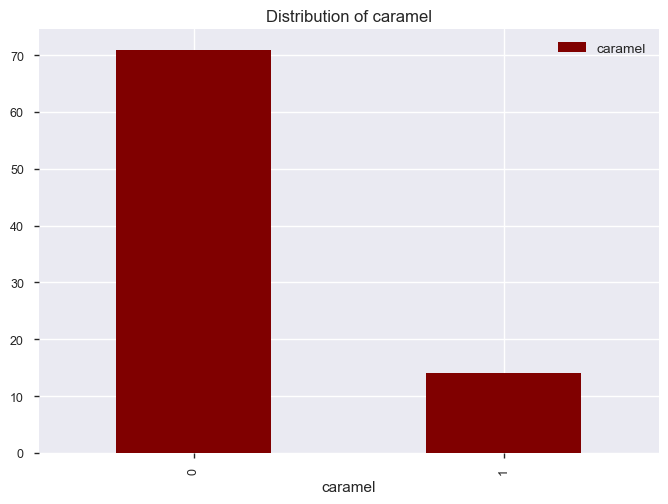

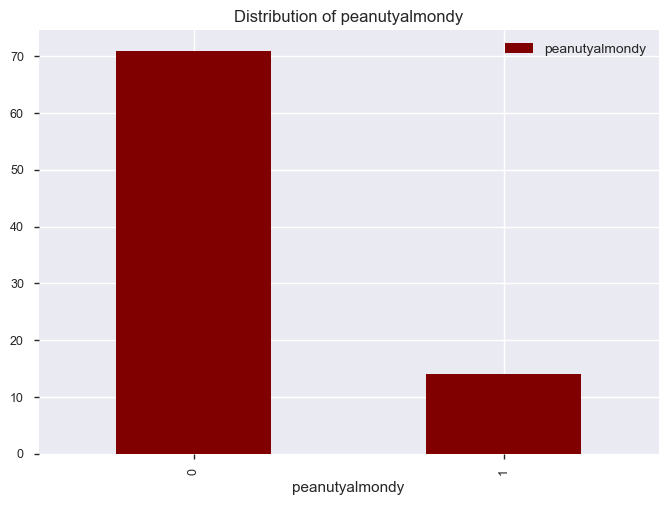

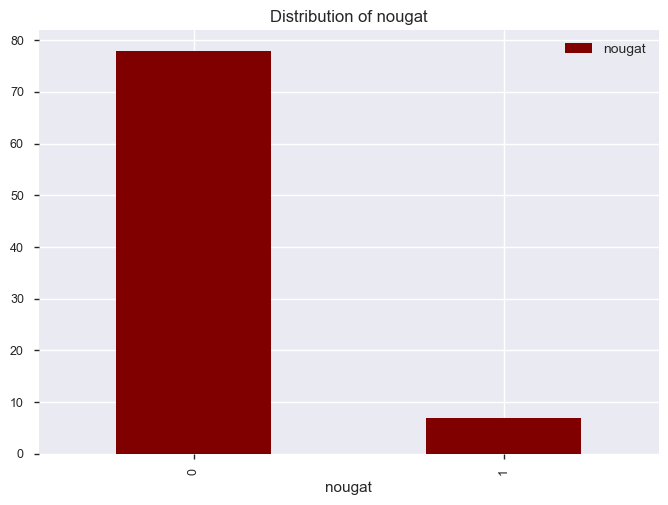

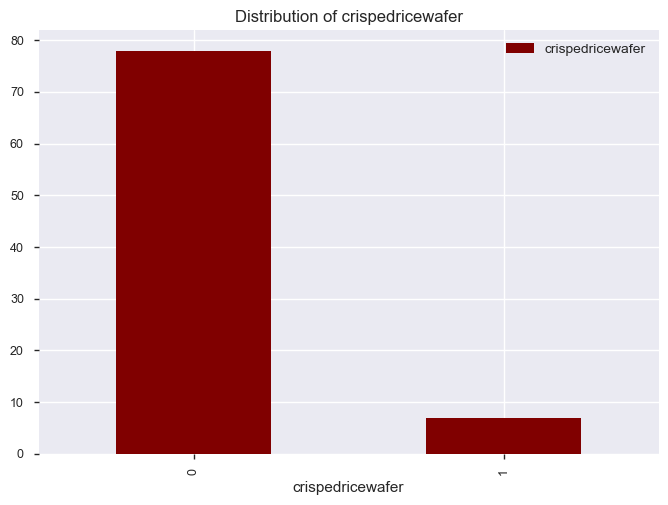

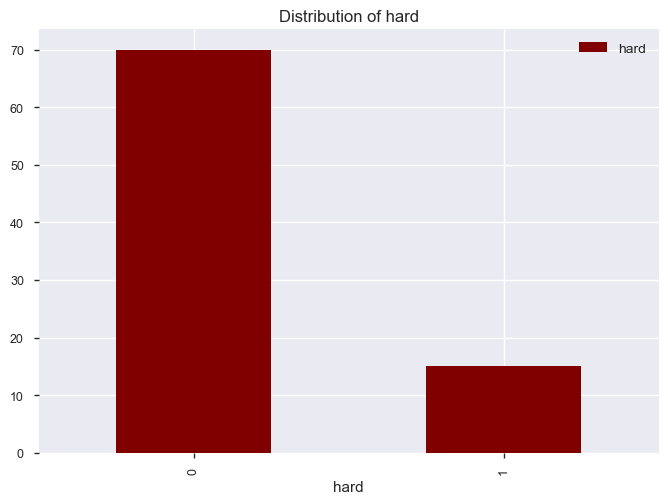

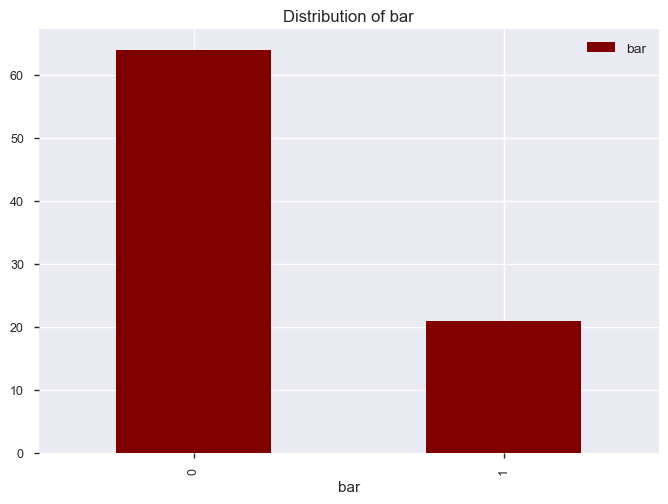

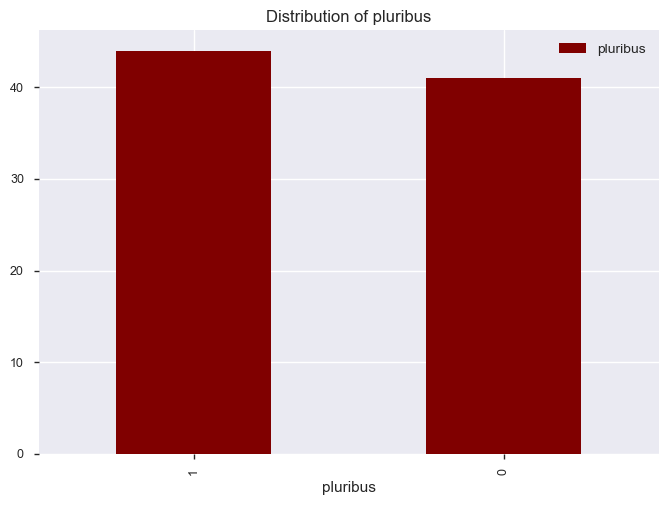

In [14]:
for i in candy_cat.columns.tolist():
    
    dist= pd.DataFrame(candy_cat[i].value_counts().sort_values(ascending=False)).reset_index()

    ax = dist.plot.bar(x='index',y=i,fontsize=9,color='maroon')

    ax.set_title("Distribution of "+i)
    ax.set_xlabel(i)

    plot.savefig('C:/project/Count plot for '+i+'.png', bbox_inches='tight')

## Pair Plots

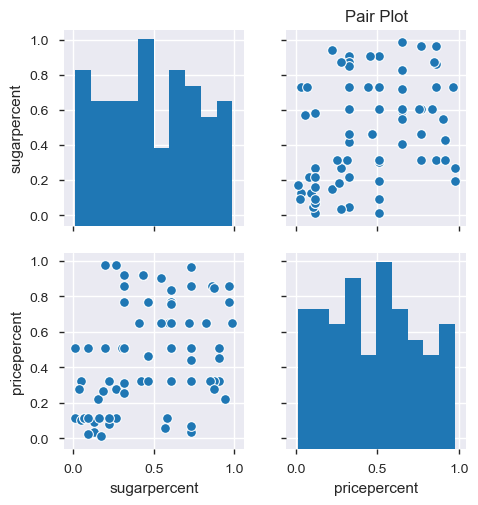

In [19]:
sns.pairplot(candy_data[["sugarpercent","pricepercent","winpercent"]],vars = ["sugarpercent","pricepercent"], dropna=True)
plot.title('Pair Plot') 
plot.savefig('C:/project/Pair plot for '+i+'.png', bbox_inches='tight')

## Box Plot

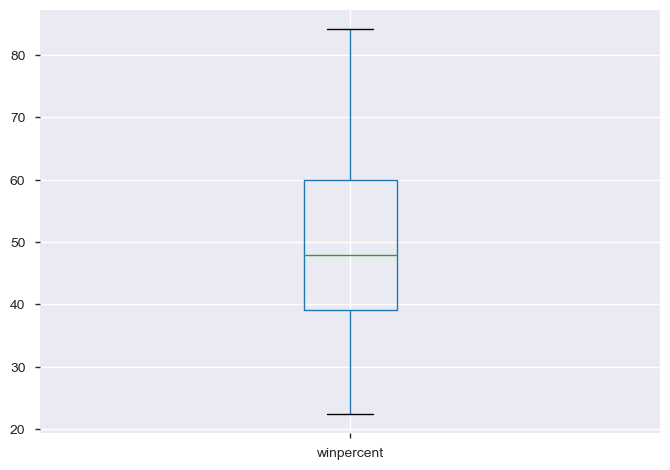

In [22]:
boxplot = candy_data.boxplot(column=['winpercent'])
plot.savefig('C:/project/box plot for '+i+'.png', bbox_inches='tight')

### Observation

From the box plot we can see that there are no such Outliers.

## SugarPercent Distribution

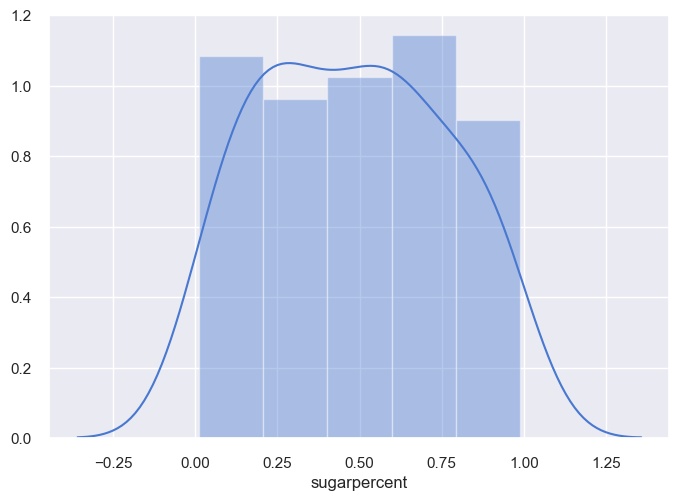

In [23]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(candy["sugarpercent"].dropna());
plot.savefig('C:/project/sugarpercent plot for '+i+'.png', bbox_inches='tight')

## observation

From the graph we can see that it is not normally distributed.

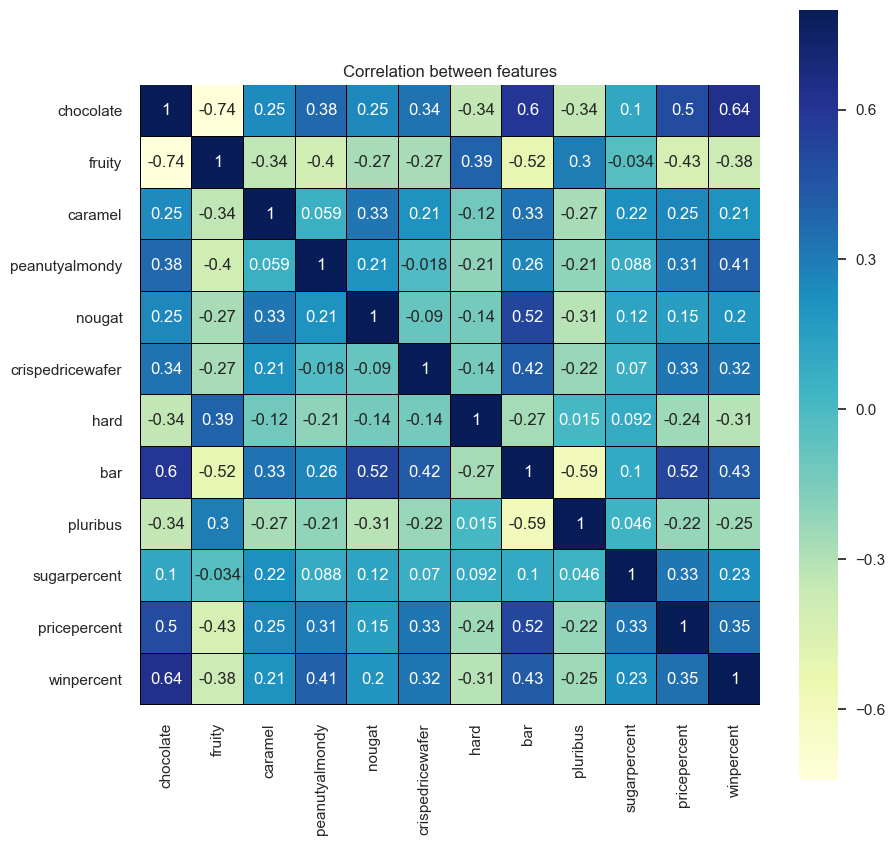

In [24]:
corr = candy.corr()
plot.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plot.title('Correlation between features')
plot.savefig('C:/project/correlation for '+i+'.png', bbox_inches='tight')

### Observation

Here we can see that fruity and chocolate are corelated with each other and same with bar and pluribus.

## 6. LINEAR REGRESSION

###### 6.1 Preparing X and y in pandas

In [10]:
X = candy.loc[:,candy.columns != 'winpercent']
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511


In [11]:
y = candy.winpercent

### 6.2 Splitting X and y into training and test datasets.

In [12]:
from sklearn.model_selection import train_test_split #package = sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
35,1,0,1,0,0,0,0,0,1,0.302,0.511
68,0,1,0,0,0,0,0,0,1,0.151,0.220
45,0,1,0,0,0,0,0,0,1,0.220,0.325
19,0,0,0,0,0,0,0,0,1,0.465,0.465
79,1,0,1,0,0,1,0,1,0,0.546,0.906
34,0,1,0,0,0,0,0,0,1,0.872,0.325
32,1,0,0,1,0,0,0,0,1,0.825,0.651
31,0,1,0,0,0,0,0,0,0,0.267,0.279
43,1,0,0,0,0,1,0,1,0,0.313,0.767
62,1,0,0,0,0,0,0,0,1,0.267,0.976


In [14]:
#scaling on X

from sklearn.preprocessing import StandardScaler #mean = 0 and SD = 1 
sc = StandardScaler()
sc.fit(X_train)                                                                                   # fit the data to Standardscaler

X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)    # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(X_trains, columns=X_train.columns).head()) 

After standardizing our features, the first 5 rows of our data now look like this:

   chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.159667 -0.915335  2.276361        -0.46291 -0.281718         -0.311086   
1  -0.862316  1.092496 -0.439298        -0.46291 -0.281718         -0.311086   
2  -0.862316  1.092496 -0.439298        -0.46291 -0.281718         -0.311086   
3  -0.862316 -0.915335 -0.439298        -0.46291 -0.281718         -0.311086   
4   1.159667 -0.915335  2.276361        -0.46291 -0.281718          3.214550   

      hard       bar  pluribus  sugarpercent  pricepercent  
0 -0.46291 -0.577350  1.029857     -0.705271      0.144174  
1 -0.46291 -0.577350  1.029857     -1.264003     -0.945144  
2 -0.46291 -0.577350  1.029857     -1.008688     -0.552091  
3 -0.46291 -0.577350  1.029857     -0.102137     -0.028020  
4 -0.46291  1.732051 -0.971008      0.197580      1.622802  


In [15]:
print(X_train.shape)
print(y_train.shape)

(68, 11)
(68,)


### 6.3 Linear regression in scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X_trains,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### 6.4 Using the Model for Prediction

In [25]:
y_pred_train = linreg.predict(X_trains)  

In [26]:
y_pred_test = linreg.predict(X_tests)       # threshold = 5

In [29]:
y_pred_test

array([55.10908166, 40.86918101, 52.10260665, 59.64778761, 59.07660229,
       44.61303163, 42.79443834, 39.50039241, 75.55900291, 55.82762664,
       40.0692605 , 62.83637085, 32.36419277, 40.0692605 , 36.00247316,
       62.77123871, 34.17200198])

## 7. Model evaluation 

In [28]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print(rmse)

12.924852701384252
